In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_5.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_5.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'sensor_concept_nn')
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer='adam')
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


# define the keras model

# Display the model
model.summary()

history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


read_x_data
read_y_data
[[-0.97820564  0.29297193 -0.07061703 -0.96544182  0.2754832  -0.07559271
  -0.95055615  0.26713403 -0.06478687 -0.94939434  0.28851273 -0.05467842
  -1.02291172  0.31880814 -0.06668594 -1.02036267  0.29820167 -0.09116619
  -0.98972578  0.26476729 -0.09036746 -0.9837491   0.30531915 -0.07307987
  -1.06898421  0.34968716 -0.03087716 -1.12097493  0.35989869 -0.06120685
  -1.15727766  0.31518646 -0.15790448 -1.05000599  0.3741363  -0.18206539
  -0.59768246  0.20031284 -0.03087716 -0.54569173  0.19010131 -0.06120685
  -0.50938901  0.23481354 -0.15790448 -0.61666068  0.1758637  -0.18206539]
 [-0.96984174  0.28045413 -0.07554428 -0.95366561  0.26681943 -0.06915842
  -0.94867445  0.2803592  -0.05532045 -0.94855848  0.30831947 -0.06174094
  -1.02365787  0.3062235  -0.08467621 -0.9992982   0.27119693 -0.09646884
  -0.9827315   0.28755233 -0.07063151 -0.96914893  0.3312652  -0.09716293
  -1.10428192  0.35754912 -0.04928571 -1.163557    0.34725352 -0.12266363
  -1.09223439

In [3]:

#max in all columns of strain data 1%error
max_val=np.max(x_data)
min_val=np.min(x_data)
range_val = max_val-min_val
shape_x_data=np.shape(x_data)
err=0.05
x_data_noise=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
#x_data_noise-x_data

X_train, X_val, y_train, y_val = train_test_split(x_data_noise, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

#history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size


In [4]:
#for 5%noise
history_5percent = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])

scores= model.evaluate(xval_scale, yval_scale, verbose=2)


Epoch 1/30
367/367 - 2s - loss: 0.1501 - val_loss: 0.1510
Epoch 2/30
367/367 - 2s - loss: 0.1377 - val_loss: 0.1484
Epoch 3/30
367/367 - 2s - loss: 0.1341 - val_loss: 0.1448
Epoch 4/30
367/367 - 2s - loss: 0.1316 - val_loss: 0.1437
Epoch 5/30
367/367 - 2s - loss: 0.1298 - val_loss: 0.1425
Epoch 6/30
367/367 - 2s - loss: 0.1282 - val_loss: 0.1386
Epoch 7/30
367/367 - 2s - loss: 0.1267 - val_loss: 0.1409
Epoch 8/30
367/367 - 2s - loss: 0.1257 - val_loss: 0.1380
Epoch 9/30
367/367 - 2s - loss: 0.1247 - val_loss: 0.1382
Epoch 10/30
367/367 - 2s - loss: 0.1238 - val_loss: 0.1372
Epoch 11/30
367/367 - 2s - loss: 0.1230 - val_loss: 0.1358
Epoch 12/30
367/367 - 2s - loss: 0.1225 - val_loss: 0.1351
Epoch 13/30
367/367 - 2s - loss: 0.1218 - val_loss: 0.1355
Epoch 14/30
367/367 - 2s - loss: 0.1214 - val_loss: 0.1339
Epoch 15/30
367/367 - 2s - loss: 0.1208 - val_loss: 0.1349
Epoch 16/30
367/367 - 2s - loss: 0.1205 - val_loss: 0.1345
Epoch 17/30
367/367 - 2s - loss: 0.1201 - val_loss: 0.1343
Epoch 

In [5]:
#Increasing the noise
err=0.1
x_data_noise_10=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_10, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

#history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size


In [6]:
#for 10% noise
history_10percent = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])

scores= model.evaluate(xval_scale, yval_scale, verbose=2)

Epoch 1/30
367/367 - 2s - loss: 0.1716 - val_loss: 0.1658
Epoch 2/30
367/367 - 2s - loss: 0.1642 - val_loss: 0.1644
Epoch 3/30
367/367 - 2s - loss: 0.1626 - val_loss: 0.1630
Epoch 4/30
367/367 - 2s - loss: 0.1617 - val_loss: 0.1626
Epoch 5/30
367/367 - 2s - loss: 0.1611 - val_loss: 0.1623
Epoch 6/30
367/367 - 2s - loss: 0.1607 - val_loss: 0.1617
Epoch 7/30
367/367 - 2s - loss: 0.1604 - val_loss: 0.1619
Epoch 8/30
367/367 - 2s - loss: 0.1601 - val_loss: 0.1614
Epoch 9/30
367/367 - 2s - loss: 0.1599 - val_loss: 0.1614
Epoch 10/30
367/367 - 2s - loss: 0.1597 - val_loss: 0.1612
Epoch 11/30
367/367 - 2s - loss: 0.1595 - val_loss: 0.1611
Epoch 12/30
367/367 - 2s - loss: 0.1594 - val_loss: 0.1610
Epoch 13/30
367/367 - 2s - loss: 0.1593 - val_loss: 0.1609
Epoch 14/30
367/367 - 2s - loss: 0.1591 - val_loss: 0.1608
Epoch 15/30
367/367 - 2s - loss: 0.1590 - val_loss: 0.1609
Epoch 16/30
367/367 - 2s - loss: 0.1590 - val_loss: 0.1608
Epoch 17/30
367/367 - 2s - loss: 0.1589 - val_loss: 0.1607
Epoch 

In [7]:
#Increasing the noise to 
err=0.2
x_data_noise_30=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_30, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

#history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size


In [8]:
#for 20%noise
history_20percent = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])

scores= model.evaluate(xval_scale, yval_scale, verbose=2)

Epoch 1/30
367/367 - 2s - loss: 0.2252 - val_loss: 0.2256
Epoch 2/30
367/367 - 2s - loss: 0.2214 - val_loss: 0.2226
Epoch 3/30
367/367 - 2s - loss: 0.2193 - val_loss: 0.2206
Epoch 4/30
367/367 - 2s - loss: 0.2178 - val_loss: 0.2190
Epoch 5/30
367/367 - 2s - loss: 0.2165 - val_loss: 0.2178
Epoch 6/30
367/367 - 2s - loss: 0.2155 - val_loss: 0.2168
Epoch 7/30
367/367 - 2s - loss: 0.2147 - val_loss: 0.2160
Epoch 8/30
367/367 - 2s - loss: 0.2140 - val_loss: 0.2154
Epoch 9/30
367/367 - 2s - loss: 0.2135 - val_loss: 0.2149
Epoch 10/30
367/367 - 2s - loss: 0.2131 - val_loss: 0.2145
Epoch 11/30
367/367 - 2s - loss: 0.2127 - val_loss: 0.2141
Epoch 12/30
367/367 - 2s - loss: 0.2124 - val_loss: 0.2138
Epoch 13/30
367/367 - 2s - loss: 0.2121 - val_loss: 0.2136
Epoch 14/30
367/367 - 2s - loss: 0.2119 - val_loss: 0.2134
Epoch 15/30
367/367 - 2s - loss: 0.2117 - val_loss: 0.2132
Epoch 16/30
367/367 - 2s - loss: 0.2115 - val_loss: 0.2130
Epoch 17/30
367/367 - 2s - loss: 0.2114 - val_loss: 0.2129
Epoch 

In [9]:
#Increasing the noise to 
err=0.3
x_data_noise_30=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_30, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

#history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size


In [10]:
#for 30%noise
history_30percent = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])

scores= model.evaluate(xval_scale, yval_scale, verbose=2)

Epoch 1/30
367/367 - 2s - loss: 0.2487 - val_loss: 0.2495
Epoch 2/30
367/367 - 2s - loss: 0.2483 - val_loss: 0.2492
Epoch 3/30
367/367 - 2s - loss: 0.2480 - val_loss: 0.2489
Epoch 4/30
367/367 - 2s - loss: 0.2477 - val_loss: 0.2487
Epoch 5/30
367/367 - 2s - loss: 0.2475 - val_loss: 0.2485
Epoch 6/30
367/367 - 2s - loss: 0.2473 - val_loss: 0.2483
Epoch 7/30
367/367 - 2s - loss: 0.2471 - val_loss: 0.2481
Epoch 8/30
367/367 - 2s - loss: 0.2469 - val_loss: 0.2480
Epoch 9/30
367/367 - 2s - loss: 0.2467 - val_loss: 0.2479
Epoch 10/30
367/367 - 2s - loss: 0.2466 - val_loss: 0.2478
Epoch 11/30
367/367 - 2s - loss: 0.2465 - val_loss: 0.2477
Epoch 12/30
367/367 - 2s - loss: 0.2464 - val_loss: 0.2476
Epoch 13/30
367/367 - 2s - loss: 0.2463 - val_loss: 0.2475
Epoch 14/30
367/367 - 2s - loss: 0.2462 - val_loss: 0.2474
Epoch 15/30
367/367 - 2s - loss: 0.2461 - val_loss: 0.2474
Epoch 16/30
367/367 - 2s - loss: 0.2461 - val_loss: 0.2473
Epoch 17/30
367/367 - 2s - loss: 0.2460 - val_loss: 0.2473
Epoch 

In [11]:
#Increasing the noise to 
err=0.4
x_data_noise_30=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_30, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

#history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size


In [12]:
#for 60%noise
history_40percent = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])

scores= model.evaluate(xval_scale, yval_scale, verbose=2)

Epoch 1/30
367/367 - 2s - loss: 0.2668 - val_loss: 0.2736
Epoch 2/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2736
Epoch 3/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2736
Epoch 4/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2736
Epoch 5/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2736
Epoch 6/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2736
Epoch 7/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2735
Epoch 8/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2735
Epoch 9/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2735
Epoch 10/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2735
Epoch 11/30
367/367 - 2s - loss: 0.2667 - val_loss: 0.2735
Epoch 12/30
367/367 - 2s - loss: 0.2666 - val_loss: 0.2735
Epoch 13/30
367/367 - 2s - loss: 0.2666 - val_loss: 0.2735
Epoch 14/30
367/367 - 2s - loss: 0.2666 - val_loss: 0.2735
Epoch 15/30
367/367 - 2s - loss: 0.2666 - val_loss: 0.2735
Epoch 16/30
367/367 - 2s - loss: 0.2666 - val_loss: 0.2735
Epoch 17/30
367/367 - 2s - loss: 0.2666 - val_loss: 0.2735
Epoch 

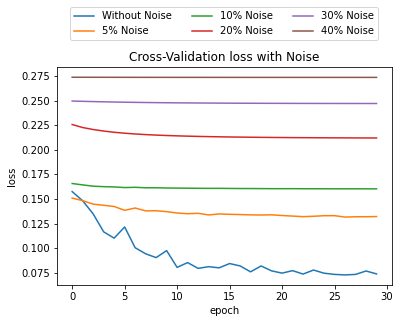

In [13]:
plt.plot(history_1.history['val_loss'])
plt.plot(history_5percent.history['val_loss'])
plt.plot(history_10percent.history['val_loss'])
plt.plot(history_20percent.history['val_loss'])
plt.plot(history_30percent.history['val_loss'])
plt.plot(history_40percent.history['val_loss'])
plt.title('Cross-Validation loss with Noise')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(labels=('Without Noise', '5% Noise', '10% Noise', '20% Noise','30% Noise','40% Noise'), bbox_to_anchor=(0.5, 1.3), ncol = 3,loc='upper center')
#plt.xlim(0,50)
#plt.ylim(0.07,0.17)
#plt.xticks(np.arange(0.0, 31, 2))
#plt.yticks(np.arange(0.07, 0.18, 0.02))
plt.savefig('Validation_Loss_with_Noise_5p.png', dpi=300, bbox_inches='tight')
plt.show()

